### 1. Team ID: Team 113

### 2. Team Members

Nayana Chandra Reddy Sandhya

Shobitha Bhaskar

Shubham Prasad

Kyle Hester

### 3. Executive Summary of Project

This project analyzes Yelp reviews and business data to uncover trends in the outdoor activities and adventure industry, such as hiking, camping, and water sports. Using machine learning and natural language processing (NLP), we aim to identify customer preferences, predict future trends, and provide actionable insights. This will help businesses, local tourism boards, and investors capitalize on emerging opportunities and enhance customer satisfaction. 

### 4. Data Sources

The Data Source which we used is Yelp datasets and we considered only two dataset for our project:

- business.csv (contains business details)
- review.csv (contains user reviews and ratings)

The filtering/selection criteria we applied to the Yelp data is:

- Businesses are selected based on outdoor activity categories (e.g., hiking, camping, fishing).
- Reviews are filtered to only include those before January 2020 and after January 2021, ensuring that the analysis has excluded COVID data.

### 5. Summary Statistics of the Data

In [6]:
import pandas as pd

# Load business dataset
business_df = pd.read_csv("business.csv")

# Load reviews dataset
review_df = pd.read_csv("review.csv")

# View dataset columns
print("Business Columns:", business_df.columns)
print("Review Columns:", review_df.columns)

Business Columns: Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')
Review Columns: Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


In [8]:
# Define relevant outdoor categories
outdoor_categories = [
    "ATV Rentals/Tours", "Amusement Parks", "Boating", "Climbing", "Diving", "Dog Parks", "Fishing", 
    "Free Diving", "Hiking", "Mobile Home Parks", "Mountain Biking",
    "Parks", "RV Parks", "Rafting/Kayaking", "Recreation Centers", "Rock Climbing", "Scuba Diving",
    "Skate Parks", "Skiing", "Snorkeling", "Surfing", "Trampoline Parks",
    "Water Parks", "Wildlife Hunting Ranges","Hiking", "Camping", "Rock Climbing", "Fishing", "Surfing",
    "Kayaking", "Rafting", "Scuba Diving", "Skydiving", "National Park",
    "Amusement Park", "Outdoor Recreation", "Playgrounds", "Kids Activities", "Parks", "Basketball Courts"
]

# Filter businesses with relevant categories
outdoor_businesses = business_df[
    business_df['categories'].str.contains('|'.join(outdoor_categories), na=False, case=False)
]

# Save filtered businesses
outdoor_businesses.to_csv("outdoor_businesses.csv", index=False)
print(f"Filtered {len(outdoor_businesses)} outdoor businesses.")

Filtered 2568 outdoor businesses.


In [10]:
# Filter reviews for outdoor businesses
outdoor_reviews = review_df[review_df['business_id'].isin(outdoor_businesses['business_id'])]

# Sample required number of reviews (adjust as needed)
sample_size = 10000  # Change to 1000 if needed
sampled_reviews = outdoor_reviews.sample(n=sample_size, random_state=42)  # Random sampling

# Save sampled reviews
sampled_reviews.to_csv(f"sampled_reviews_{sample_size}.csv", index=False)
print(f"Extracted {len(sampled_reviews)} reviews for outdoor businesses.")

Extracted 10000 reviews for outdoor businesses.


In [12]:
import pandas as pd

# Save the filtered outdoor businesses dataset
outdoor_businesses.to_csv("outdoor_businesses.csv", index=False)
print(f"Saved {len(outdoor_businesses)} outdoor businesses to 'outdoor_businesses.csv'.")

# Save the extracted reviews (1,000 or 10,000 sample)
sample_size = 10000  # Change to 1000 if needed
sampled_reviews = outdoor_reviews.sample(n=sample_size, random_state=42)

# Save extracted reviews
sampled_reviews.to_csv(f"sampled_reviews_{sample_size}.csv", index=False)
print(f"Saved {len(sampled_reviews)} reviews to 'sampled_reviews_{sample_size}.csv'.")

Saved 2568 outdoor businesses to 'outdoor_businesses.csv'.
Saved 10000 reviews to 'sampled_reviews_10000.csv'.


In [14]:
# Load the provided outdoor_businesses.csv file to check its contents
business_file_path = "outdoor_businesses.csv"
business_df = pd.read_csv(business_file_path)

# Load the sampled_reviews_10000.csv dataset 
review_file_path = "sampled_reviews_10000.csv"  
df = pd.read_csv(review_file_path)  

# Merge datasets on 'business_id' to get region info and business names
df_merged = df.merge(business_df[['business_id', 'name', 'city', 'state']], on='business_id', how='left')

In [16]:
# Convert date column to datetime format
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Filter dataset to include pre-COVID (before 2019) and post-COVID (2021 and later)
filtered_df = df_merged[(df_merged["date"] < "2020-01-01") | (df_merged["date"] >= "2021-01-01")]

# Verify the new time range
filtered_time_range = {
    "Earliest Review": filtered_df["date"].min(),
    "Latest Review": filtered_df["date"].max(),
    "Remaining Reviews": filtered_df.shape[0]
}

# Display the new filtered dataset time range
print(filtered_time_range)

{'Earliest Review': Timestamp('2006-05-11 00:47:48'), 'Latest Review': Timestamp('2022-01-19 02:32:36'), 'Remaining Reviews': 9205}


In [18]:
# Check the first few rows
print(filtered_df.head())

# Basic stats on sampled reviews
print("Total Reviews Extracted:", len(filtered_df))
print("Star Rating Distribution:")
print(filtered_df['stars'].value_counts())

                review_id                 user_id             business_id  \
0  oaI4pVyIjG-fgzQWbg-P8Q  TrU49Ydk2ZMjlh0rtOVj7g  2pXrwBssKTp30uxbQgl6kw   
1  ZbqZ6d5hA7YHWPu8ROwaIw  AIWTRfsnhi7JsFykiyolhQ  _9_aqbw4ak8qFskzxHxrpQ   
2  q_eo-emDdk6KFIPdQVihmw  sxTd0ht37Ml7DAwS5iYR0Q  yip92_y6BgpQdcX486b_RQ   
3  cq0IuuOonTvIWyVXR49nag  LmaOptmkvxVEvftB3_AsFw  YvK5-g2wXZEr32odwBMx3A   
4  X7a3r-bptzz5Ite3rp5Ffg  5tw_WmtXGNjOegnOFfdgXw  pdwHLvSSepLZaS6xmcRjQw   

   stars  useful  funny  cool  \
0    5.0      51     31    55   
1    5.0       0      0     0   
2    5.0       1      0     1   
3    5.0       1      0     0   
4    5.0       2      0     1   

                                                text                date  \
0  For nine years St. Pete Beach has been the Flo... 2019-10-23 20:56:57   
1  This place is amazingly fun and awesome!  I lo... 2015-01-21 01:29:30   
2  We came to check out the canyon. We didn't hik... 2017-09-23 17:12:11   
3  To my surprise, this park not o

In [20]:
# Number of reviews
num_reviews = filtered_df.shape[0]

# Tokenizing the text column to count words
filtered_df = filtered_df.copy()
filtered_df["word_count"] = filtered_df["text"].apply(lambda x: len(x.split()))

# Total number of tokens (words)
total_tokens = filtered_df["word_count"].sum()

# Number of unique words (vocabulary size)
unique_words = len(set(" ".join(filtered_df["text"]).split()))

# Average review length (words per review)
avg_review_length = filtered_df["word_count"].mean()

# Number of unique customers (users)
num_unique_customers = filtered_df["user_id"].nunique()

# Number of unique businesses
num_unique_businesses = filtered_df["business_id"].nunique()

# Distribution of star ratings
star_distribution = filtered_df["stars"].value_counts().sort_index()

# Distribution of useful, funny, cool votes
useful_distribution = filtered_df["useful"].describe()
funny_distribution = filtered_df["funny"].describe()
cool_distribution = filtered_df["cool"].describe()

# Display results
summary_stats = {
    "Number of Reviews": num_reviews,
    "Total Tokens": total_tokens,
    "Unique Words": unique_words,
    "Average Review Length": avg_review_length,
    "Unique Customers": num_unique_customers,
    "Unique Businesses": num_unique_businesses
}

summary_stats, star_distribution, useful_distribution, funny_distribution, cool_distribution

({'Number of Reviews': 9205,
  'Total Tokens': 1092411,
  'Unique Words': 62539,
  'Average Review Length': 118.67582835415536,
  'Unique Customers': 8403,
  'Unique Businesses': 1930},
 stars
 1.0    1009
 2.0     518
 3.0     773
 4.0    2040
 5.0    4865
 Name: count, dtype: int64,
 count    9205.000000
 mean        1.784465
 std         3.948445
 min         0.000000
 25%         0.000000
 50%         1.000000
 75%         2.000000
 max       100.000000
 Name: useful, dtype: float64,
 count    9205.000000
 mean        0.545247
 std         2.053140
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max        82.000000
 Name: funny, dtype: float64,
 count    9205.000000
 mean        0.915263
 std         3.214109
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max        99.000000
 Name: cool, dtype: float64)

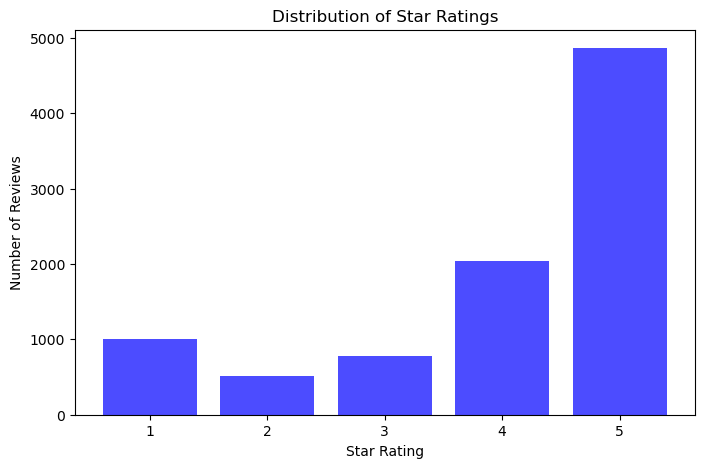

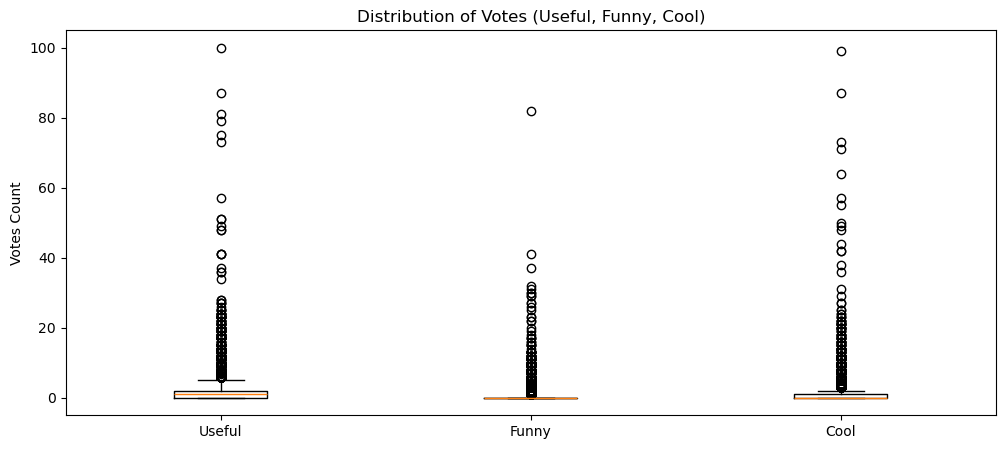

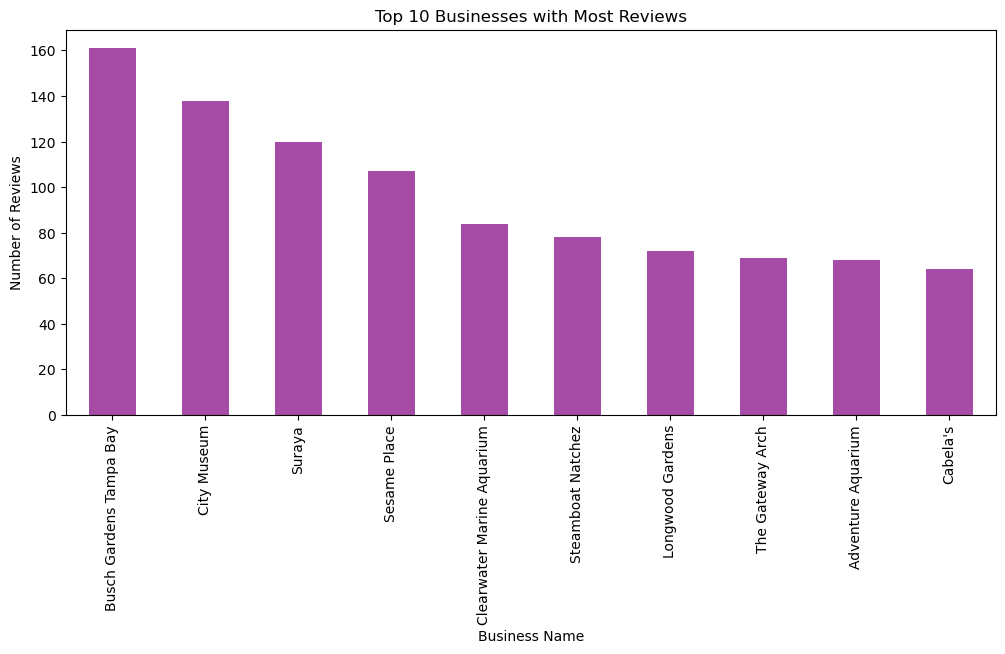

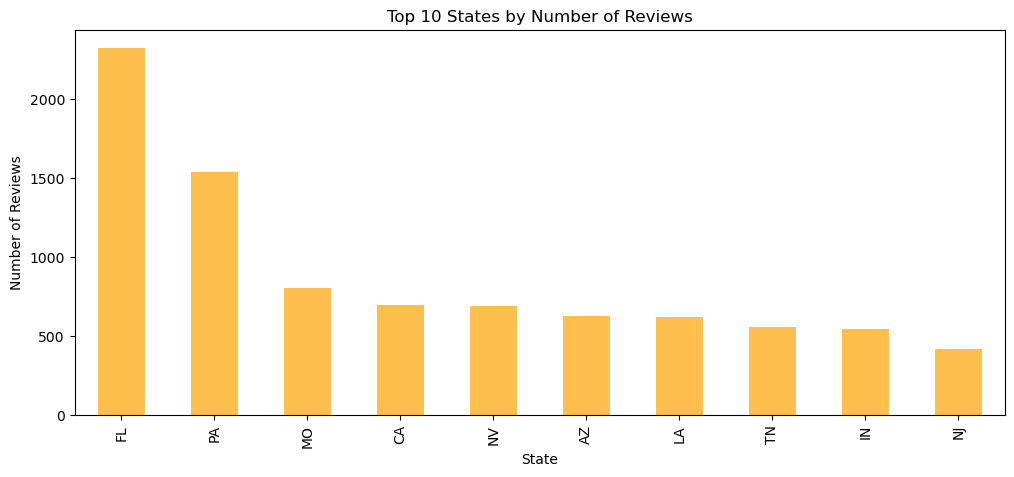

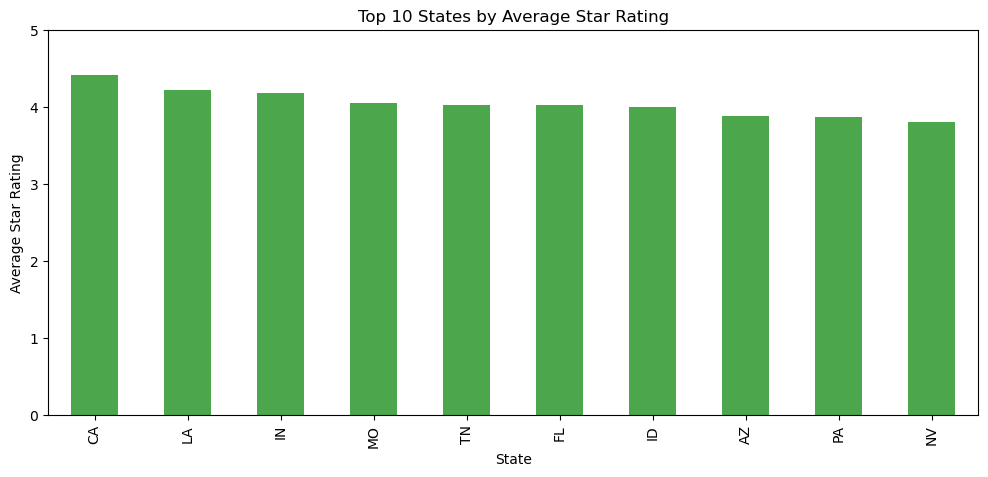

In [22]:
import matplotlib.pyplot as plt

# Compute distributions
star_distribution = filtered_df["stars"].value_counts().sort_index()
state_review_distribution = filtered_df["state"].value_counts().head(10)  # Now only top 10 states
city_review_distribution = filtered_df["city"].value_counts().head(10)
business_distribution = filtered_df["name"].value_counts().head(10)  # Now only top 10 businesses

# Visualizations

# Star Rating Distribution
plt.figure(figsize=(8, 5))
plt.bar(star_distribution.index, star_distribution.values, color='blue', alpha=0.7)
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Star Ratings")
plt.xticks(star_distribution.index)
plt.show()

# Boxplot: Distribution of Votes
plt.figure(figsize=(12, 5))
plt.boxplot([filtered_df["useful"], filtered_df["funny"], filtered_df["cool"]], labels=["Useful", "Funny", "Cool"])
plt.ylabel("Votes Count")
plt.title("Distribution of Votes (Useful, Funny, Cool)")
plt.show()

# Business Distribution (Top 10 Businesses with Most Reviews)
plt.figure(figsize=(12, 5))
business_distribution.plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel("Business Name")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Businesses with Most Reviews")
plt.xticks(rotation=90)
plt.show()

# State-wise Review Distribution (Top 10 States)
plt.figure(figsize=(12, 5))
state_review_distribution.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel("State")
plt.ylabel("Number of Reviews")
plt.title("Top 10 States by Number of Reviews")
plt.xticks(rotation=90)
plt.show()

# Average Rating per State (Top 10)
avg_rating_per_state = filtered_df.groupby("state")["stars"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
avg_rating_per_state.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel("State")
plt.ylabel("Average Star Rating")
plt.title("Top 10 States by Average Star Rating")
plt.xticks(rotation=90)
plt.ylim(0, 5)  # Rating scale
plt.show()

### 6. Data Evaluation

a. How the selected data (e.g., reviews/customers/business/regions) are suitable for answering your business questions.

- The dataset includes reviews from both pre-2019 and post-2021, allowing for a comparison of consumer behavior before and after COVID disruptions.
- Outdoor activity businesses are well represented, making the dataset relevant for understanding trends in this industry over time.

b. Whether the sample size is appropriate, and why

- The chosen sample size is 10,000, ensuring that diverse customer opinions across different outdoor businesses are captured.
- It is large enough to provide statistically significant insights while preventing overfitting to specific businesses.
- The sample is filtered to include only outdoor business reviews, making it suitable for evaluating trends in the adventure and recreation industry.
- Processing 10,000 reviews is manageable for NLP tasks, such as sentiment analysis, without excessive computational burden.
- If needed, the sample size can be reduced to 1,000 reviews to improve efficiency while still retaining meaningful insights.

c. Whether the selected data could be biased in certain dimension in your analysis

- The selected data may be biased in time period, business popularity, geography, reviewer sentiment, and sampling strategy.
- The dataset now includes reviews from both pre-2019 and post-2021, potentially capturing shifts in business popularity and consumer sentiment after COVID.
- Businesses that thrived post-2019 are now included, ensuring a more balanced representation.
- The review dataset had a gap during the COVID period, so post-COVID data (2021 onwards) has been incorporated to improve analysis.

 d. The potential challenges to process the data

1. Handling Unstructured Text Data:
- The review dataset consists of unstructured text, requiring text cleaning and preprocessing (e.g., removing special characters, stopwords, and emojis) before analysis.

2. Data Volume and Computational Limitations:
- Processing 10,000 reviews for sentiment analysis and NLP tasks may require significant computational resources.

3. Missing or Incomplete Data:
- Some reviews may be incomplete, contain missing values, or lack sufficient context for meaningful sentiment analysis.
- Handling missing business attributes (e.g., category, location) may require imputation or exclusion.

4. Potential Data Imbalance:
- If most reviews are positive, sentiment analysis may be skewed, reducing the effectiveness of classification models.
- Ensuring a balanced representation of positive, neutral, and negative reviews is necessary for reliable insights.

5. Bias in Review Content:
- Reviews may contain sarcasm, mixed sentiments, or ambiguous language, making it difficult for NLP models to interpret sentiment correctly.
- Context-dependent words (e.g., “This place is so bad... that it’s actually great!”) require advanced NLP models to detect sarcasm.

6. Data Merging and Filtering Issues:
- Combining business and review datasets requires proper key matching (e.g., business_id) to avoid mismatches.
- Filtering reviews by time period (pre-2019 and post-2021) ensures consistency while allowing for a comparison of pre- and post-COVID trends.

### 7. Preliminary Data Exploration

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shobitha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


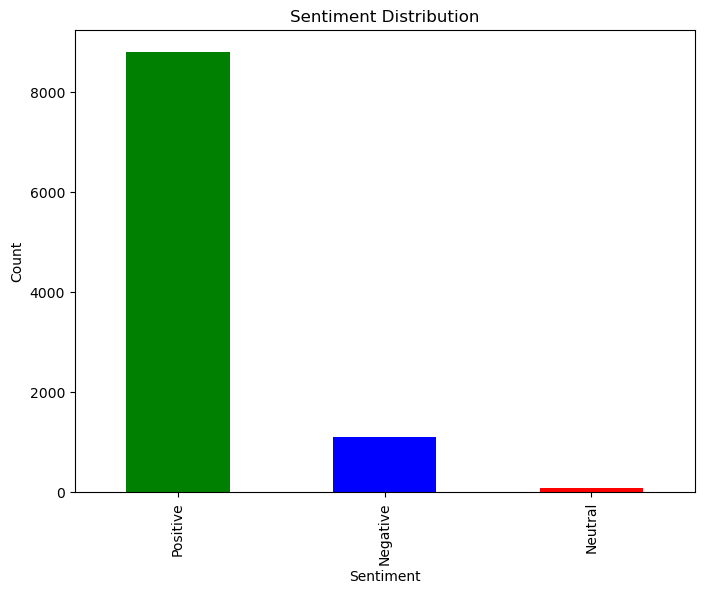

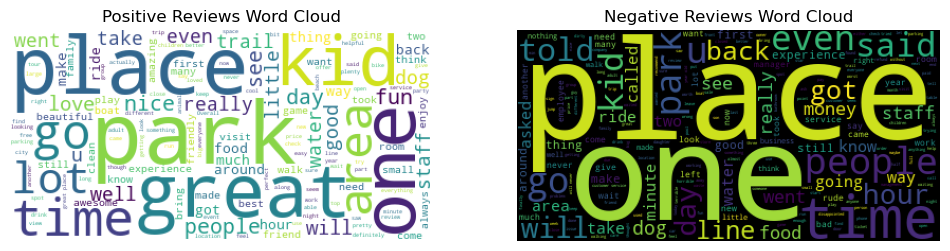

Sentiment Distribution (%):
 sentiment
Positive    88.02
Negative    11.11
Neutral      0.87
Name: proportion, dtype: float64


In [26]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the sampled reviews dataset
df = pd.read_csv("sampled_reviews_10000.csv")  

# Ensure NLTK resources are available
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Ensure 'text' column exists and handle missing values
df = df[['text']].dropna()  # Keep only the review text and drop missing values

# Apply Sentiment Analysis
df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Classify Sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Plot Sentiment Distribution
plt.figure(figsize=(8,6))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Generate Word Clouds
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['text'])
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['text'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Positive Reviews Word Cloud")
plt.imshow(WordCloud(background_color='white').generate(positive_reviews))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Negative Reviews Word Cloud")
plt.imshow(WordCloud(background_color='black').generate(negative_reviews))
plt.axis("off")

plt.show()

# Display sentiment statistics
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution (%):\n", sentiment_counts)

In [38]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import umap

# Extract text data for BERTopic
text_data = filtered_df['text'].dropna().tolist()

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=5, n_neighbors=15, metric='cosine', random_state=42)

# Initialize BERTopic model
vectorizer_model = CountVectorizer(stop_words="english")
bertopic_model = BERTopic(vectorizer_model=vectorizer_model, umap_model=umap_model, language="english")

# Fit BERTopic model
topics, probs = bertopic_model.fit_transform(text_data)

# Get topic information for top 10 topics
topic_info = bertopic_model.get_topic_info().head(10)
print(topic_info)

# Extract representative documents
representative_docs = bertopic_model.get_representative_docs()
for topic_id, docs in representative_docs.items():
    if topic_id < 10:
        print(f"Topic {topic_id} Representative Documents:")
        for doc in docs[:3]:  # Print top 3 representative documents per topic
            print(f"- {doc[:200]}...")

   Topic  Count                              Name  \
0     -1   3066          -1_place_kids_great_time   
1      0    803    0_trail_park_trails_playground   
2      1    437            1_dog_dogs_park_owners   
3      2    152        2_zoo_animals_zoos_exhibit   
4      3    140         3_bike_bikes_bicycle_shop   
5      4    133  4_aquarium_shark_dolphin_animals   
6      5    132       5_room_escape_rooms_puzzles   
7      6    130        6_rv_stay_sites_campground   
8      7    118      7_beach_sand_parking_beaches   
9      8    116      8_wendy_customer_called_rude   

                                      Representation  \
0  [place, kids, great, time, food, just, fun, go...   
1  [trail, park, trails, playground, hike, nice, ...   
2  [dog, dogs, park, owners, small, run, area, gr...   
3  [zoo, animals, zoos, exhibit, animal, giraffes...   
4  [bike, bikes, bicycle, shop, service, customer...   
5  [aquarium, shark, dolphin, animals, tanks, tan...   
6  [room, escape, rooms,

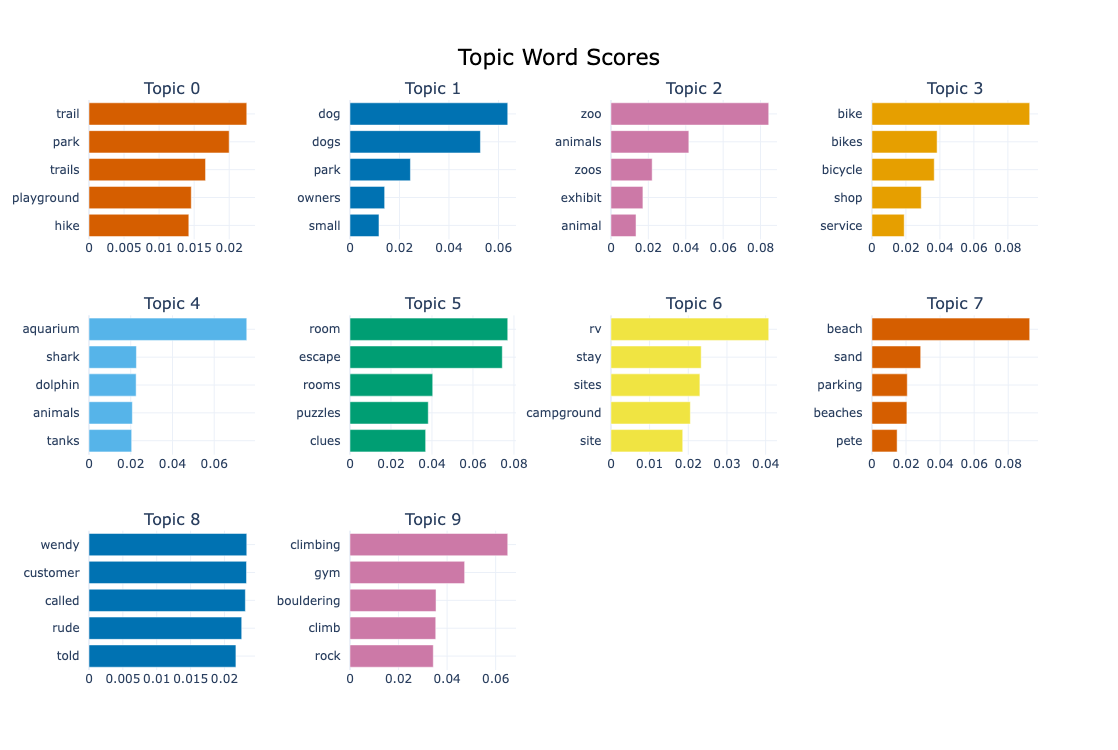

In [34]:
bertopic_model.visualize_barchart(top_n_topics=10)

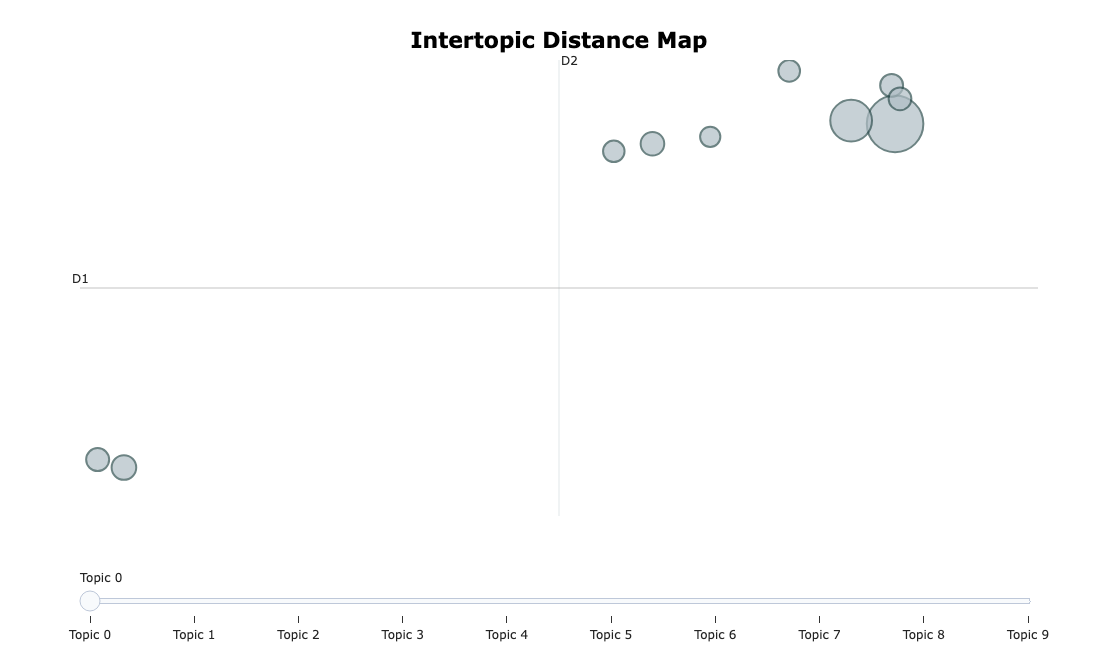

In [36]:
bertopic_model.visualize_topics(top_n_topics=10)

**Key Insights for Bertopic**

**1. Topic Distribution and Prevalence**
- Dominant Topic (-1): The dataset contains 3,066 reviews that belong to a general cluster or are unassignable to a specific topic.
Top 10 Topics Identified:
- Topic 0 (803 reviews): Related to "trail, park, trails, playground" – likely discussions on outdoor parks and hiking trails.
- Topic 1 (437 reviews): Focused on "dog, dogs, park, owners" – suggests a strong presence of reviews about dog parks.
- Topic 2 (152 reviews): Revolves around "zoo, animals, exhibit" – indicates discussions on zoo visits and exhibits.
- Topic 3 (140 reviews): "bike, bikes, bicycle, shop" – implies bicycle-related businesses or biking trails.
- Topic 4 (133 reviews): Mentions "aquarium, shark, dolphin, animals" – discussions likely about marine life exhibits.
- Topic 5 (132 reviews): "room, escape, rooms, puzzles" – indicates an interest in escape rooms and puzzle-solving activities.
- Topic 6 (130 reviews): "rv, stay, sites, campground" – highlights discussions on RV parks and campgrounds.
- Topic 7 (118 reviews): "beach, sand, parking, beaches" – represents discussions on beach visits and amenities.
- Topic 8 (116 reviews): "wendy, customer, called, rude" – likely customer service complaints about a specific experience.
  
**2. Topic Representations**
- Each topic is represented by a set of key words, which provide insight into the central themes of each group.
- Topics mostly revolve around outdoor activities, recreational sites, and customer experiences.
  
**3. Intertopic Distance Map**
- Topics appear to be somewhat clustered but distinct, with some overlap.
- The red-highlighted topic is the most dominant, indicating that it has a high prevalence in the dataset.
  
**4. Topic Visualization (Bar Chart)**
- The top 10 topics are well-defined, showing a clear hierarchy in terms of frequency.
- Topics such as parks, dog parks, and zoos have significant representation, indicating that reviews in the dataset are centered on outdoor recreation and animal-related activities.

**Key Takeaways**
- Most discussions are about outdoor recreation and animal-related experiences, including parks, dog parks, biking, and zoo visits.
- Campgrounds and beach visits are also key themes, showing interest in nature and travel experiences.
- Customer service issues are highlighted in Topic 8, which may require further analysis.
- The intertopic distance map suggests some overlap between topics but also shows distinct themes.

### 8. Proposed Solution
For this project, we have utilized machine learning and unstructured data analytics techniques to analyze customer reviews of outdoor businesses. Our approach focuses on sentiment analysis and topic modeling to extract key insights from customer perceptions.

#### Sentiment Analysis using VADER
We employed VADER (Valence Aware Dictionary and sEntiment Reasoner), a rule-based lexicon approach to analyze sentiment in review text.
- VADER assigns sentiment scores (positive, neutral, or negative) based on predefined word sentiment intensities.
- This method is effective for short-text sentiment classification, making it well-suited for analyzing Yelp reviews.

#### Data Preprocessing for NLP
To ensure high-quality analysis, we applied essential text preprocessing steps, including:
- **Handling missing values** – Dropped reviews with empty text.
- **String conversion** – Ensured text is processed correctly by converting non-string data types.

#### Topic Modeling with BERTopic
To gain deeper insights beyond sentiment, we applied **BERTopic**, a topic modeling approach that extracts key themes from reviews:
- **UMAP Dimensionality Reduction** – Reduced text representations to 5 dimensions for better clustering.
- **BERTopic Model Training** – Extracted meaningful topics using cosine similarity and clustering.
- **Key Findings:**
  - Topics focused on **outdoor recreation**, including **parks, trails, dog parks, zoos, beaches, and campgrounds**.
  - A subset of reviews highlighted **customer service concerns**, providing actionable insights.
  - **Visualizations**: Topic distributions, bar charts, and intertopic distance maps were generated to explore relationships between themes.

#### Visualization & Insights
We generated data-driven visualizations to interpret sentiment and topic trends:
- **Bar Chart for Sentiment Distribution** – Displays the proportion of positive, neutral, and negative reviews.
- **Word Cloud Analysis** – Highlights frequently used words in positive vs. negative reviews to identify key themes.
- **BERTopic Visualizations** – Topic word distributions, intertopic distance maps, and bar charts to understand key discussion points.